### Solution to the 2D boundary layer equations

In [85]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget

In [86]:
Nx = 2000
Ny = 100
Re = 10000.0

In [87]:
ymax = 3 * 4.91/np.sqrt(Re)

x = np.linspace( 0.0 , 1.0 , Nx )
y = np.linspace( 0.0 , ymax , Ny )

dx = x[1]-x[0]
dy = y[1]-y[0]

#%%
U = np.ones((Nx,Ny))
V = np.zeros((Nx,Ny))

#%% boundary condition
U[:,0] = 0.0
V[:,0] = 0.0

#%%
for ix in range(1,Nx):
    dudy    = (1/(2*dy)) * (U[ix-1,2:]-U[ix-1,0:Ny-2])
    d2udy2  = (1/dy**2) * (U[ix-1,2:]-2*U[ix-1,1:Ny-1]+U[ix-1,0:Ny-2])
    U[ix,1:Ny-1] = U[ix-1,1:Ny-1] \
                 - dx * V[ix-1,1:Ny-1]  / U[ix-1,1:Ny-1] * dudy \
                 + dx/Re * d2udy2       / U[ix-1,1:Ny-1]
    U[ix,0] = 0.0 # not necessary, just in case
    
    dudx       = (1/dx) * (U[ix,:]-U[ix-1,:]) # upwind in x
    # dudx[1:Ny] = .5*(dudx[1:Ny]+dudx[0:Ny-1]) # take the average
    # DUDX[ix,:] = dudx # for debug
    
    V[ix,1:Ny] = np.cumsum(-dy*dudx[0:Ny-1])
    V[ix,0] = 0.0 # not necessary, just in case

# compute boundary layer thickness
d99     = np.zeros((Nx,1))
dstar   = np.zeros((Nx,1))
theta   = np.zeros((Nx,1))
for i in range(0,len(x)):
    d99[i]   = np.interp(0.99,U[i,:],y)
    dstar[i] = np.trapz( y , 1-U[i,:] )
    theta[i] = np.trapz( y , U[i,:]*(1-U[i,:]) )    

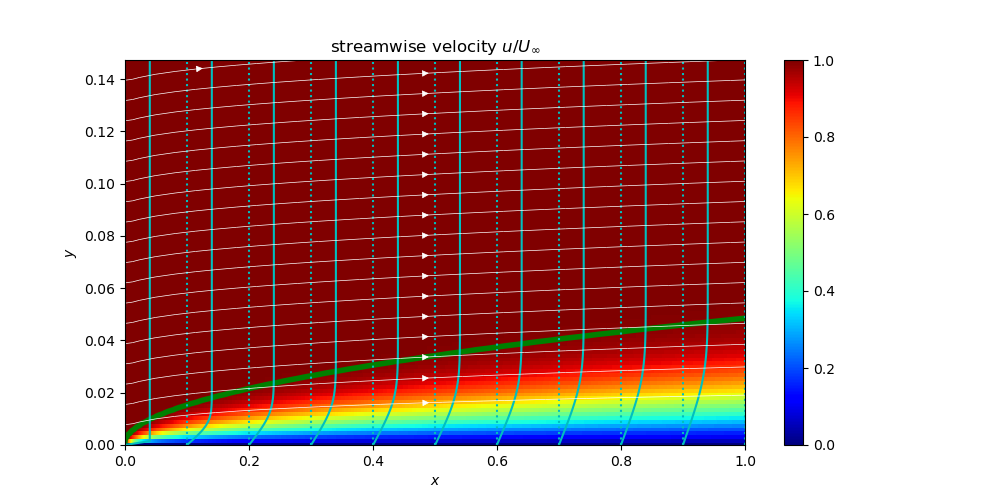

In [88]:
XX, YY = np.meshgrid(x,y)

plt.figure(figsize=(10,5))
plt.pcolormesh(x,y,U.T,shading='nearest',cmap='jet')
plt.colorbar()
plt.plot(x,d99,'g',linewidth=4)
plt.title('streamwise velocity $u/U_\infty$')

for i in range(0,11):
    this_i = np.argmin(np.abs(x-np.single(i)*0.1))
    plt.plot(x[this_i]+U[this_i,:]*.04,y,'c')
    plt.plot(x[this_i]*np.ones((Ny,1)),y,':c')

seed_points = np.zeros((20,2))
# seed_points[:,1] = ymax * np.linspace(.05,1.0,20)**2
seed_points[:,1] = ymax * np.linspace(0,1.0,20)
# seed_points = np.array([[np.zeros((10,1))], np.reshape( np.linspace(ymax/20.0,ymax,10) , 1,-1) ]])
plt.streamplot( XX,YY , U.T,V.T , start_points=seed_points , \
               color='white',maxlength=3,linewidth=0.5,broken_streamlines=True)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0,1)
plt.ylim(0,np.max(y))

plt.show()

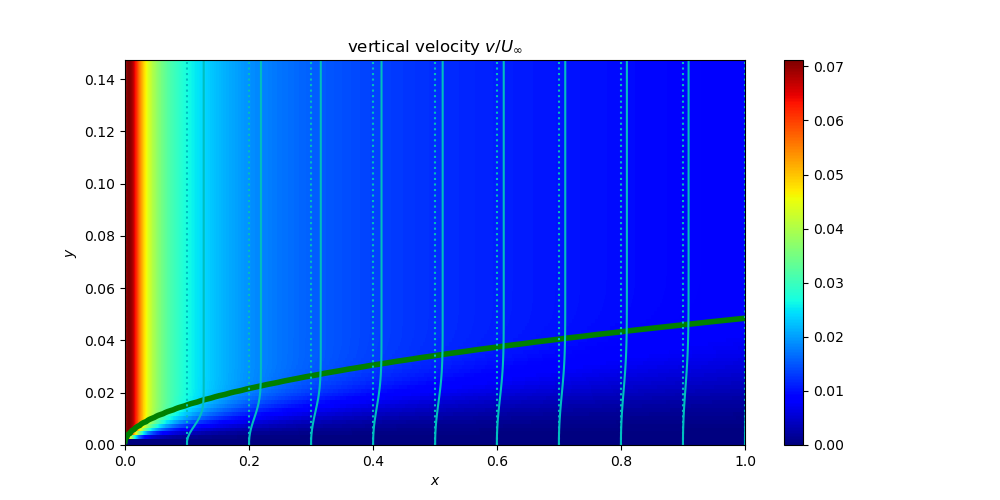

In [89]:
plt.figure(figsize=(10,5))
plt.pcolormesh(x,y,V.T,shading='nearest',cmap='jet')
plt.colorbar()
plt.plot(x,d99,'g',linewidth=4)
plt.title('vertical velocity $v/U_\infty$')

for i in range(0,11):
    this_i = np.argmin(np.abs(x-np.single(i)*0.1))
    plt.plot(x[this_i]+V[this_i,:],y,'c')
    plt.plot(x[this_i]*np.ones((Ny,1)),y,':c')
    
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0,1)
plt.ylim(0,np.max(y))
plt.show()

/tmp/ipykernel_16102/2377209263.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,dstar/theta,label='bl.eq.')


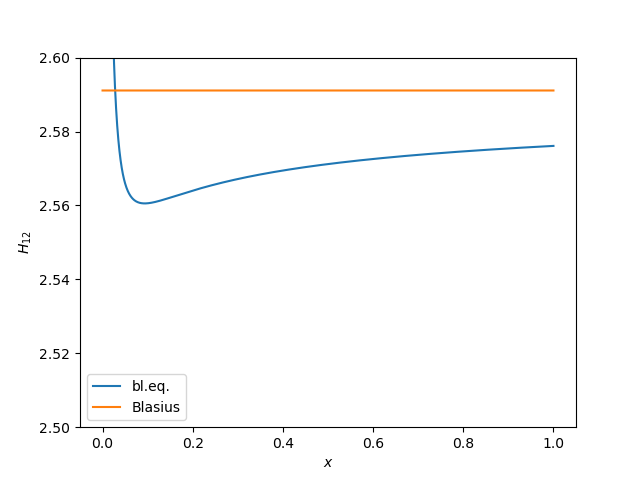

In [90]:
plt.figure()
plt.plot(x,dstar/theta,label='bl.eq.')
plt.ylim(2.5,2.6)
plt.plot(x,x*0+2.591100362,label='Blasius')
plt.xlabel(r'$x$')
plt.ylabel(r'$H_{12}$')
plt.legend()           